# Lab | Hypothesis Testing

**Objective**

Welcome to the Hypothesis Testing Lab, where we embark on an enlightening journey through the realm of statistical decision-making! In this laboratory, we delve into various scenarios, applying the powerful tools of hypothesis testing to scrutinize and interpret data.

From testing the mean of a single sample (One Sample T-Test), to investigating differences between independent groups (Two Sample T-Test), and exploring relationships within dependent samples (Paired Sample T-Test), our exploration knows no bounds. Furthermore, we'll venture into the realm of Analysis of Variance (ANOVA), unraveling the complexities of comparing means across multiple groups.

So, grab your statistical tools, prepare your hypotheses, and let's embark on this fascinating journey of exploration and discovery in the world of hypothesis testing!

**Challenge 1**

In this challenge, we will be working with pokemon data. The data can be found here:

- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv

In [1]:
#libraries
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv")
df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


- We posit that Pokemons of type Dragon have, on average, more HP stats than Grass. Choose the propper test and, with 5% significance, comment your findings.

In [3]:
# Filter for Dragon and Grass types
df_filtered = df[df['Type 1'].isin(['Dragon', 'Grass'])]

In [4]:
# Calculate mean HP for each type
mean_hp = df_filtered.groupby('Type 1')['HP'].mean()
print(mean_hp)

Type 1
Dragon    83.312500
Grass     67.271429
Name: HP, dtype: float64


In [5]:
from scipy.stats import ttest_ind

# Separate the HP values for each type
dragon_hp = df_filtered[df_filtered['Type 1'] == 'Dragon']['HP']
grass_hp = df_filtered[df_filtered['Type 1'] == 'Grass']['HP']

# Perform the t-test
t_stat, p_value = ttest_ind(dragon_hp, grass_hp, alternative='greater')
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 3.590444254130357, P-value: 0.0002567969150153481


- We posit that Legendary Pokemons have different stats (HP, Attack, Defense, Sp.Atk, Sp.Def, Speed) when comparing with Non-Legendary. Choose the propper test and, with 5% significance, comment your findings.


In [6]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA

# Load data
url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv"
df = pd.read_csv(url)

# Select relevant columns
df_manova = df[['Legendary', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

# Fit MANOVA
maov = MANOVA.from_formula('HP + Attack + Defense + Q("Sp. Atk") + Q("Sp. Def") + Speed ~ Legendary', data=df_manova)
print(maov.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0592 6.0000 793.0000 2100.8338 0.0000
         Pillai's trace  0.9408 6.0000 793.0000 2100.8338 0.0000
 Hotelling-Lawley trace 15.8953 6.0000 793.0000 2100.8338 0.0000
    Roy's greatest root 15.8953 6.0000 793.0000 2100.8338 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
          Legendary        Value  Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
             Wilks' lambda 0.7331 6.0000 793.0000 48.1098 0.0000
            Pillai's trace 0.2669 6.0000 793.

**Challenge 2**

In this challenge, we will be working with california-housing data. The data can be found here:
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


**We posit that houses close to either a school or a hospital are more expensive.**

- School coordinates (-118, 34)
- Hospital coordinates (-122, 37)

We consider a house (neighborhood) to be close to a school or hospital if the distance is lower than 0.50.

Hint:
- Write a function to calculate euclidean distance from each house (neighborhood) to the school and to the hospital.
- Divide your dataset into houses close and far from either a hospital or school.
- Choose the propper test and, with 5% significance, comment your findings.
 

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

T-statistic: 37.9923
P-value: 0.0000
✅ At 5% significance, we reject the null hypothesis.
Conclusion: Houses close to a school or hospital tend to be more expensive.


<Figure size 800x500 with 0 Axes>

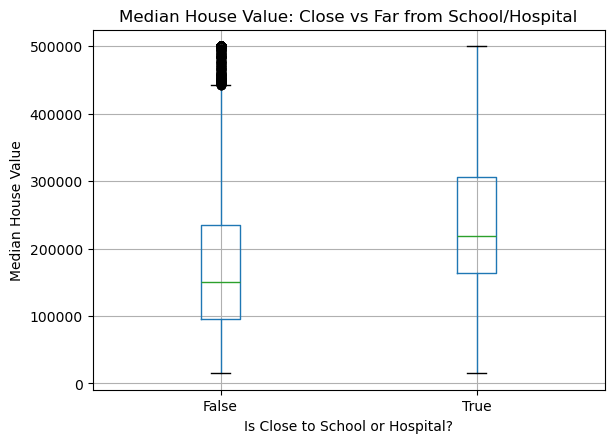

In [9]:
# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv"
df = pd.read_csv(url)

# Step 2: Define Euclidean distance function
def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)

# Step 3: Compute distances to school and hospital
school_coords = (-118, 34)
hospital_coords = (-122, 37)

df['dist_to_school'] = euclidean_distance(df['longitude'], df['latitude'], *school_coords)
df['dist_to_hospital'] = euclidean_distance(df['longitude'], df['latitude'], *hospital_coords)

# Step 4: Label as 'close' if distance < 0.5
df['is_close'] = ((df['dist_to_school'] < 0.5) | (df['dist_to_hospital'] < 0.5))

# Step 5: Compare house values
close_values = df[df['is_close']]['median_house_value']
far_values = df[~df['is_close']]['median_house_value']

# Step 6: Statistical test (independent t-test)
t_stat, p_value = ttest_ind(close_values, far_values, equal_var=False)

# Step 7: Report results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("✅ At 5% significance, we reject the null hypothesis.")
    print("Conclusion: Houses close to a school or hospital tend to be more expensive.")
else:
    print("❌ At 5% significance, we fail to reject the null hypothesis.")
    print("Conclusion: No significant difference in house values based on proximity.")

# Optional: Boxplot visualization
plt.figure(figsize=(8,5))
df.boxplot(column='median_house_value', by='is_close')
plt.title("Median House Value: Close vs Far from School/Hospital")
plt.suptitle("")
plt.xlabel("Is Close to School or Hospital?")
plt.ylabel("Median House Value")
plt.show()
